In [0]:
#importing important libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


In [0]:
#csv file uploading to google colab
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (2).csv


In [0]:
#creating a data framework using pandas
import io
gs=pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [0]:
#removing excess data fields not to be included in training
dl=['Unnamed: 0','match_event_id','location_x','location_y','game_season','area_of_shot','shot_basics','range_of_shot','team_name','date_of_game','home/away','lat/lng','type_of_shot','type_of_combined_shot','match_id','team_id','remaining_min.1','power_of_shot.1','knockout_match.1','remaining_sec.1','distance_of_shot.1']
gs=gs.drop(dl,axis=1)

In [0]:
#resetting the index of the framework for overcoming any null value or non-finite value error
gs=gs.reset_index()

In [0]:
#datatype conversion from float to int
gs['remaining_min']=gs['remaining_min'].fillna(0).astype(int)

In [0]:
#datatype conversion from float to int
gs['shot_id_number']=gs['shot_id_number'].fillna(0).astype(int)

In [0]:
#datatype conversion from float to int
gs['power_of_shot']=gs['power_of_shot'].fillna(0).astype(int)

In [0]:
#datatype conversion from float to int
gs['knockout_match']=gs['knockout_match'].fillna(0).astype(int)

In [0]:
#datatype conversion from float to int
gs['remaining_sec']=gs['remaining_sec'].fillna(0).astype(int)

In [0]:
#datatype conversion from float to int
gs['distance_of_shot']=gs['distance_of_shot'].fillna(0).astype(int)

In [0]:
#datatype conversion from float to int
gs['is_goal']=gs['is_goal'].fillna(0).astype(int)

In [0]:
#data standardizatin and splitting
from sklearn.model_selection import train_test_split
X = gs.iloc[:,:-1]
y = gs['is_goal']
data = scale(X)
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=42)

In [95]:
#model selection and training the split data
from sklearn import  linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
print("Accuracy",lr.score(X_test, y_test))

Accuracy 0.9086960813345178


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:

!pip install pandas_ml

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False       6167   319     6486
True         606  3039     3645
__all__     6773  3358    10131


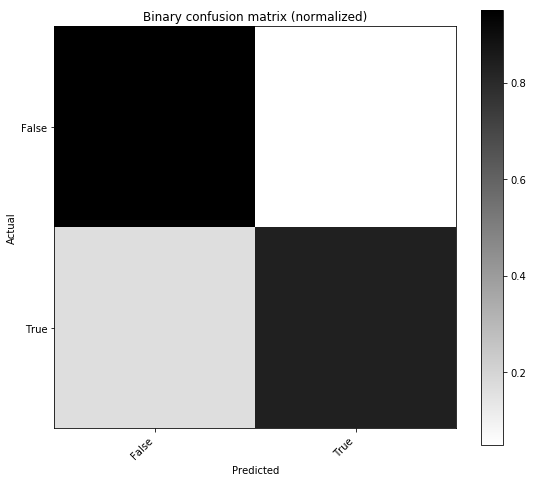

population: 10131
P: 3645
N: 6486
PositiveTest: 3358
NegativeTest: 6773
TP: 3039
TN: 6167
FP: 319
FN: 606
TPR: 0.8337448559670781
TNR: 0.9508171446191798
PPV: 0.9050029779630733
NPV: 0.9105270928687436
FPR: 0.04918285538082023
FDR: 0.09499702203692674
FNR: 0.1662551440329218
ACC: 0.9086960813345178
F1_score: 0.8679137512494645
MCC: 0.7998961832075853
informedness: 0.7845620005862579
markedness: 0.8155300708318167
prevalence: 0.3597867930115487
LRP: 16.951940864584543
LRN: 0.17485501284214866
DOR: 96.94855520034763
FOR: 0.08947290713125645


In [96]:
#creating the confusion matrix for validation of the model
y_predicted = np.array(lr.predict(X_test))
y_prob=lr.predict_proba(X_test)[:,1]
y_right = np.array(y_test)
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [97]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6486
           1       0.91      0.83      0.87      3645

    accuracy                           0.91     10131
   macro avg       0.91      0.89      0.90     10131
weighted avg       0.91      0.91      0.91     10131



In [0]:
from google.colab import files
uploaded=files.upload()

Saving sample_submission.csv to sample_submission (2).csv


In [0]:
import io
df=pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))

In [0]:
#Mean absolute error calculation
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_predicted)

In [0]:
7